In [59]:
# import libraries
import numpy as np
import sys
import matplotlib.pyplot as plt
import cv2
import glob
import skimage.transform as trans
import model
from tensorflow.keras.models import save_model
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [60]:
# lists for data
x_train = []
y_train = []
x_test = []
y_test = []

In [61]:
# import images with yes class
path = "../Dataset/test/no/"
images = glob.glob(path + "*.jpg")
images.sort()

In [21]:
for x in images:
    image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
    image = image / 255
    image = trans.resize(image,(256,256))
    y_test.append(0)
    x_test.append(image)

In [22]:
# import images with yes class
path = "../Dataset/test/yes/"
images = glob.glob(path + "*.jpg")
images.sort()

In [23]:
for x in images:
    image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
    image = image / 255
    image = trans.resize(image,(256,256))
    y_test.append(1)
    x_test.append(image)

In [24]:
# import images with no class
path = "../Dataset/no/"
images = glob.glob(path + "*.jpg")
images.sort()

In [25]:
# read in image
for x in images:
    image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
    image = image/256
    image = trans.resize(image,(256,256))
    y_train.append(0)
    x_train.append(image)

In [26]:
# import images with yes class
path = "../Dataset/yes/"
images = glob.glob(path + "*.jpg")
images.sort()

In [27]:
# read in image
for x in images:
    image = cv2.imread(x, cv2.IMREAD_GRAYSCALE)
    image = image/256
    image = trans.resize(image,(256,256))
    y_train.append(1)
    x_train.append(image)

In [31]:
# create numpy arrays with images
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [32]:
# reshape arrays with np.reshape
x_train = np.reshape(x_train, (len(x_train), 256, 256, 1))
x_test = np.reshape(x_test, (len(x_test), 256, 256, 1))

In [33]:
# train the model
BTdetector = model.cnn_bt()

In [34]:
history = BTdetector.fit(x_train, y_train, epochs=15, batch_size=4, verbose=1, validation_split=0.1)

Epoch 1/15
652/652 [==============================] - 95s 146ms/step - loss: 0.4340 - acc: 0.7948 - val_loss: 0.3029 - val_acc: 0.9448
Epoch 2/15
652/652 [==============================] - 98s 151ms/step - loss: 0.2097 - acc: 0.9202 - val_loss: 0.3412 - val_acc: 0.8793
Epoch 3/15
652/652 [==============================] - 93s 142ms/step - loss: 0.1208 - acc: 0.9586 - val_loss: 0.1166 - val_acc: 0.9655
Epoch 4/15
652/652 [==============================] - 93s 143ms/step - loss: 0.0676 - acc: 0.9789 - val_loss: 0.2530 - val_acc: 0.9345
Epoch 5/15
652/652 [==============================] - 92s 141ms/step - loss: 0.0558 - acc: 0.9839 - val_loss: 0.0761 - val_acc: 0.9897
Epoch 6/15
652/652 [==============================] - 92s 142ms/step - loss: 0.0405 - acc: 0.9862 - val_loss: 0.0716 - val_acc: 0.9828
Epoch 7/15
652/652 [==============================] - 96s 148ms/step - loss: 0.0192 - acc: 0.9935 - val_loss: 0.1801 - val_acc: 0.9552
Epoch 8/15
652/652 [==============================] - 9

In [35]:
# save the model
save_model(BTdetector, 'Model.h5')

In [36]:
# save weights of the model
BTdetector.save_weights('weights.hdf5')

In [37]:
# evaluate the model on test set
results = BTdetector.evaluate(x_test,y_test,verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [0.0017541819252073765, 1.0]


In [38]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


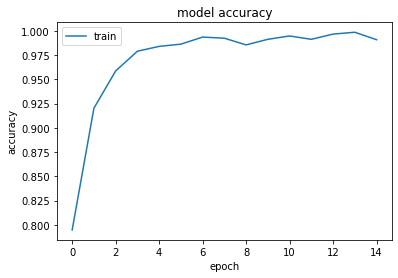

In [39]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

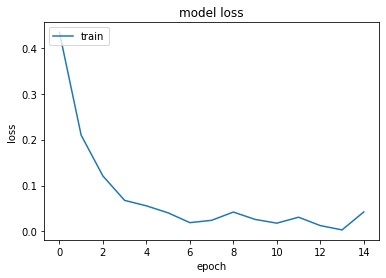

In [40]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

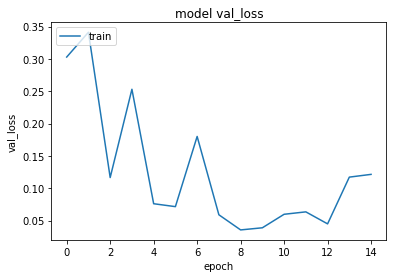

In [41]:
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

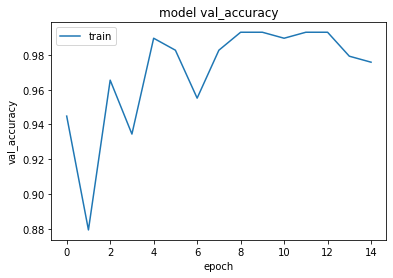

In [42]:
# summarize history for accuracy
plt.plot(history.history['val_acc'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [46]:
pred=BTdetector.predict(x_test)

In [50]:
for i in range (len(pred)):
    if (pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [54]:
classification_report(y_test, pred, labels=[1,0])

'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        51\n           0       1.00      1.00      1.00        51\n\n    accuracy                           1.00       102\n   macro avg       1.00      1.00      1.00       102\nweighted avg       1.00      1.00      1.00       102\n'

In [57]:
cf_matrix = confusion_matrix(y_test, pred)

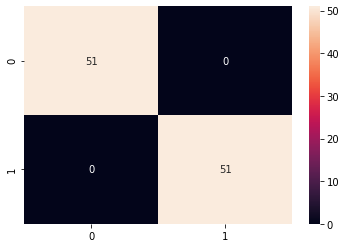

In [58]:
sns.heatmap(cf_matrix, annot=True)